In [19]:
## Starter code

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# The following statements should get the three data files loaded as DataFrames. 

airlines = pd.read_csv("../resource/asnlib/publicdata/airlines.csv")
airports = pd.read_csv("../resource/asnlib/publicdata/airports.csv")
flights  = pd.read_csv("https://www3.nd.edu/~jng2/flights_20_perc.csv") 
# the flights file is ~140mb so will take a few seconds to load

#### <font color='#AA5578'>A glimpse of each dataset:

In [20]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,10,14,3,UA,356,N494UA,11618,13930,1945,...,2104.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,27,2,MQ,3458,N671MQ,ORD,MLI,820,...,1100.0,107.0,0,0,NaN,34.0,0.0,0.0,63.0,10.0
2,2015,7,6,1,B6,1202,N535JB,FLL,JFK,1507,...,1809.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,6,13,6,DL,2529,N301DQ,ATL,CLE,2204,...,2343.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,6,6,6,WN,2560,N7729A,CLT,BWI,1325,...,1459.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [22]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


## <font color='#DD8EAE'>1. Do flight delays happen more often later in the day compared to earlier in the day? 

In [23]:
# since whether a flight is considered as delay or not depends on its arrival time,
# i am going to only look at ARRIVAL_DELAY not DEPARTURE_DELAY 

# creating a df for all delayed flights

flights_delay = flights[(flights['ARRIVAL_DELAY']>0)]

# flights that are delayed earlier in the day
flights_delay_earlier = flights_delay[(flights_delay['SCHEDULED_DEPARTURE']<=1200)]

# flights that are delayed later in the day
flights_delay_later = flights_delay[(flights_delay['SCHEDULED_DEPARTURE']>1200)]

print("Number of delays earlier in the day:", len(flights_delay_earlier))
print("Number of delays later in the day:", len(flights_delay_later))

Number of delays earlier in the day: 143603
Number of delays later in the day: 273771


In [24]:
print("Number of total delayed flights:",len(flights_delay))

Number of total delayed flights: 417374


In [29]:
(143603 / 417374)*100

34.406311845011906

In [30]:
(273771 / 417374)*100

65.5936881549881

#### <font color='#AA5578'>Thus, flights delays happened more often later in the day than earlier in the day.


## <font color='#DD8EAE'>2. Does the response to Claim 1 depend on the month of the year? 


In [6]:
# flight delays earlier in the day by month

df_earlier_group = flights_delay_earlier.groupby('MONTH')
earlier_delays_by_month = df_earlier_group['FLIGHT_NUMBER'].count().reset_index(name='NUMBER_OF_DELAYS')
earlier_delays_by_month

,MONTH,NUMBER_OF_DELAYS
0,1,13420
1,2,12546
2,3,13347
3,4,12102
4,5,11536
5,6,13331
6,7,12711
7,8,11849
8,9,9176
9,10,10228


In [7]:
# flight delays later in the day by month

df_later_group = flights_delay_later.groupby('MONTH')
later_delays_by_month = df_later_group['FLIGHT_NUMBER'].count().reset_index(name='NUMBER_OF_DELAYS')
later_delays_by_month

,MONTH,NUMBER_OF_DELAYS
0,1,23487
1,2,22400
2,3,24734
3,4,22070
4,5,23639
5,6,28157
6,7,27165
7,8,24389
8,9,17401
9,10,18057


Text(0.5,0,'Month')

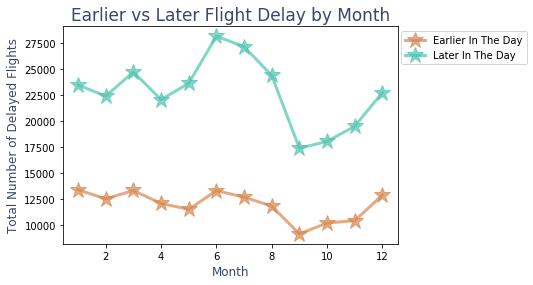

In [8]:
# visualizing the data

figure, axes = plt.subplots()
axes.plot(earlier_delays_by_month['MONTH'], earlier_delays_by_month['NUMBER_OF_DELAYS'], 
          linestyle='-',linewidth='3',label='Earlier In The Day',alpha=0.7,marker='*',markersize='17',color="#D68851")
axes.plot(later_delays_by_month['MONTH'], later_delays_by_month['NUMBER_OF_DELAYS'], 
          linestyle='-',linewidth='3',label='Later In The Day',alpha=0.7,marker='*',markersize='17',color="#50C4AD")

axes.legend()
plt.legend(bbox_to_anchor = [1.4, 1.0])

axes.set_title(label='Earlier vs Later Flight Delay by Month', loc='center', size = '17', color='#3A466F')

axes.set_ylabel('Total Number of Delayed Flights',size = '12', color='#3A466F')
axes.set_xlabel('Month', size = '12', color='#3A466F')

#### <font color='#AA5578'>Based on both statistical and visual analysis results, I learned that there were more delays later in the day than earlier in the day regardless of what month. Using June as an example, it had the highest delay rate earlier in the day. Likewise, it also had the highest delay rate later in the day.

## <font color='#DD8EAE'>3. Does the response to Claim 1 depend on the airline? Which airlines have this phenomenon more pronounced and less pronounced? 


In [9]:
# flight delays earlier in the day by airline

df_earlier_group2 = flights_delay_earlier.groupby('AIRLINE')
earlier_delays_by_airline = df_earlier_group2['FLIGHT_NUMBER'].count().reset_index(name='NUMBER_OF_DELAYS').sort_values(by='AIRLINE')
earlier_delays_by_airline

,AIRLINE,NUMBER_OF_DELAYS
0,AA,18335
1,AS,4528
2,B6,6312
3,DL,18146
4,EV,15091
5,F9,2774
6,HA,2074
7,MQ,7836
8,NK,4240
9,OO,16663


In [10]:
# flight delays later in the day by airline

df_later_group2 = flights_delay_later.groupby('AIRLINE')
later_delays_by_airline = df_later_group2['FLIGHT_NUMBER'].count().reset_index(name='NUMBER_OF_DELAYS').sort_values(by='AIRLINE')
later_delays_by_airline

,AIRLINE,NUMBER_OF_DELAYS
0,AA,32078
1,AS,6960
2,B6,14325
3,DL,32115
4,EV,27301
5,F9,5432
6,HA,3877
7,MQ,13016
8,NK,7164
9,OO,27849


Text(0.5,0,'Airline')

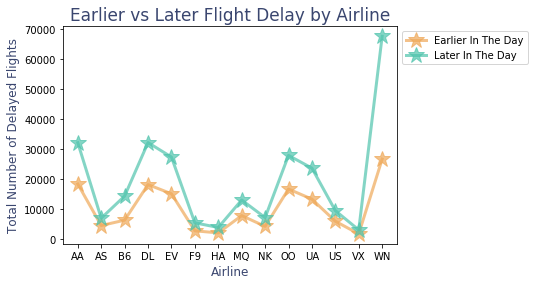

In [11]:
# visualizing the data

figure, axes = plt.subplots()
axes.plot(earlier_delays_by_airline['AIRLINE'], earlier_delays_by_airline['NUMBER_OF_DELAYS'], 
          linestyle='-',linewidth='3',label='Earlier In The Day',alpha=0.7,marker='*',markersize='17',color="#EFA959")
axes.plot(later_delays_by_airline['AIRLINE'], later_delays_by_airline['NUMBER_OF_DELAYS'], 
          linestyle='-',linewidth='3',label='Later In The Day',alpha=0.7,marker='*',markersize='17',color="#50C4AD")

axes.legend()
plt.legend(bbox_to_anchor = [1.0, 1.0])

axes.set_title(label='Earlier vs Later Flight Delay by Airline', loc='center', size = '17', color='#3A466F')

axes.set_ylabel('Total Number of Delayed Flights', size = '12', color='#3A466F')
axes.set_xlabel('Airline', size = '12', color='#3A466F')

#### <font color='#AA5578'>Based on both statistical and visual analysis results, I learned that WN (Southwest Airlines) had the most pronounced phenomenon that it had a lot more delays later in the day than earlier in the day -- the total number of delayed flights later in the day was more than twice the total number of delayed flights earlier in the day. AA (American Airlines), DL (Delta Airlines), EV (Atlantic Southeast Airlines), OO (SkyWest Airlines), UA (United Airlines), etc had moderate phenomenon that they had more delays later in the day. On the contrary, AS (Alaska Airlines), F9 (Frontier Airlines), HA (Hawaiian Airlines), NK(Spirit Airlines), VX (Virgin America), etc, did not have a significant difference between earlier flight delays and later flight delays. Generally speaking, every airline in this dataset delayed more often later in the day than they did earlier in the morning.

## <font color='#DD8EAE'>4. Do flight cancellations happen more often later in the day than earlier in the day? 


In [12]:
flights_cancelled_earlier = flights[(flights['CANCELLED']==1) & (flights['SCHEDULED_DEPARTURE']<=1200)]
flights_cancelled_later = flights[(flights['CANCELLED']==1) & (flights['SCHEDULED_DEPARTURE']>1200)]

print("Number of flight cancellation earlier in the day:", len(flights_cancelled_earlier))
print("Number of flight cancellation later in the day:", len(flights_cancelled_later))

Number of flight cancellation earlier in the day: 7063
Number of flight cancellation later in the day: 11081


#### <font color='#AA5578'>Yes, flight cancellations happened more often later in the day than earlier in the day.


## <font color='#DD8EAE'>5. Does the response to Claim 4 depend on the month of the year and on the airline? 


In [13]:
# flight cancellations earlier in the day by month

earlier_cancellations_by_month = flights_cancelled_earlier.groupby(['MONTH'])['FLIGHT_NUMBER'].count().reset_index(name='NUMBER_OF_CANCELLATIONS')
earlier_cancellations_by_month

,MONTH,NUMBER_OF_CANCELLATIONS
0,1,1043
1,2,1777
2,3,907
3,4,337
4,5,398
5,6,590
6,7,351
7,8,345
8,9,143
9,10,179


In [14]:
# flight cancellations later in the day by month

later_cancellations_by_month = flights_cancelled_later.groupby(['MONTH'])['FLIGHT_NUMBER'].count().reset_index(name='NUMBER_OF_CANCELLATIONS')
later_cancellations_by_month

,MONTH,NUMBER_OF_CANCELLATIONS
0,1,1386
1,2,2385
2,3,1256
3,4,519
4,5,726
5,6,1276
6,7,656
7,8,662
8,9,272
9,10,319


Text(0.5,0,'Month')

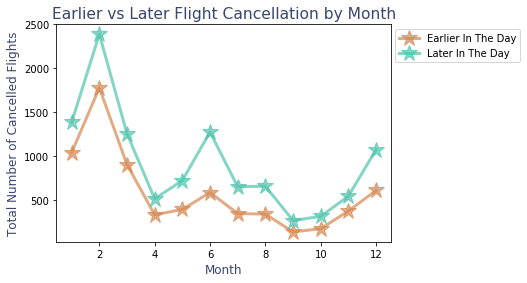

In [15]:
# visualizing the data

figure, axes = plt.subplots()
axes.plot(earlier_cancellations_by_month['MONTH'], earlier_cancellations_by_month['NUMBER_OF_CANCELLATIONS'], 
          linestyle='-',linewidth='3',label='Earlier In The Day',alpha=0.7,marker='*',markersize='17',color="#D68851")
axes.plot(later_cancellations_by_month['MONTH'], later_cancellations_by_month['NUMBER_OF_CANCELLATIONS'], 
          linestyle='-',linewidth='3',label='Later In The Day',alpha=0.7,marker='*',markersize='17',color="#50C4AD")

axes.legend()
plt.legend(bbox_to_anchor = [1.4, 1.0])

axes.set_title(label='Earlier vs Later Flight Cancellation by Month', loc='center', size = '15.5', color='#3A466F')

axes.set_ylabel('Total Number of Cancelled Flights', size = '12', color='#3A466F')
axes.set_xlabel('Month', size = '12', color='#3A466F')

#### <font color='#AA5578'>Based on the data analysis, the difference between number of earlier flight cancellations and number of later flight cancellations was the most pronounced in June. On the contrary, it was not so pronounced in months such as, September, October, or November. This happened could be a result from June being the travel peak time in the States, whereas starting September, people all went back to school/ work. Not until December had them begun to travel for holidays again. Overall, cancellations later in the day happened more often than earlier in the day all year long.

In [16]:
# flight cancellations earlier in the day by airline

earlier_cancellations_by_airline = flights_cancelled_earlier.groupby(['AIRLINE'])['FLIGHT_NUMBER'].count().reset_index(name='NUMBER_OF_CANCELLATIONS').sort_values(by='AIRLINE')
earlier_cancellations_by_airline

,AIRLINE,NUMBER_OF_CANCELLATIONS
0,AA,908
1,AS,70
2,B6,359
3,DL,296
4,EV,1021
5,F9,42
6,HA,10
7,MQ,1079
8,NK,144
9,OO,758


In [17]:
# flight cancellations later in the day by airline

later_cancellations_by_airline = flights_cancelled_later.groupby(['AIRLINE'])['FLIGHT_NUMBER'].count().reset_index(name='NUMBER_OF_CANCELLATIONS').sort_values(by='AIRLINE')
later_cancellations_by_airline

,AIRLINE,NUMBER_OF_CANCELLATIONS
0,AA,1258
1,AS,85
2,B6,528
3,DL,453
4,EV,2047
5,F9,81
6,HA,26
7,MQ,1958
8,NK,261
9,OO,1276


Text(0.5,0,'Month')

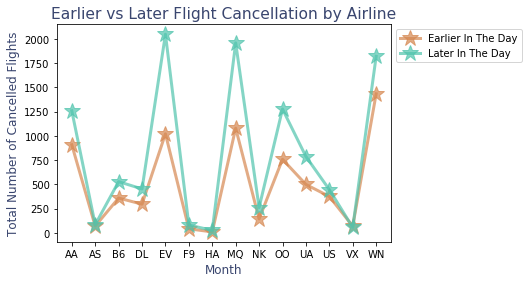

In [18]:
# visualizing the data

figure, axes = plt.subplots()
axes.plot(earlier_cancellations_by_airline['AIRLINE'], earlier_cancellations_by_airline['NUMBER_OF_CANCELLATIONS'], 
          linestyle='-',linewidth='3',label='Earlier In The Day',alpha=0.7,marker='*',markersize='17',color="#D68851")
axes.plot(later_cancellations_by_airline['AIRLINE'], later_cancellations_by_airline['NUMBER_OF_CANCELLATIONS'], 
          linestyle='-',linewidth='3',label='Later In The Day',alpha=0.7,marker='*',markersize='17',color="#50C4AD")

axes.legend()
plt.legend(bbox_to_anchor = [1.0, 1.0])

axes.set_title(label='Earlier vs Later Flight Cancellation by Airline', loc='center', size = '15.5', color='#3A466F')

axes.set_ylabel('Total Number of Cancelled Flights', size = '12', color='#3A466F')
axes.set_xlabel('Month', size = '12', color='#3A466F')

#### <font color='#AA5578'>Whether the flight cancellation happened more often earlier in the day or later in the day varied among different airlines. We can see from both statistical and visual analysis that there were a few airlines who had much more cancellations later in the day than they did earlier in the day. Those airlines include but not limited to: EV (Atlantic Southeast Airlines, MQ (American Eagle Airlines), and OO (Skywest Airlines). Other airlines also had more delays later in the day but did not have a significant difference. VX (Virgin America) was the only airline that had more cancellations earlier in the day. 

## <font color='#DD8EAE'>6. State based analysis: What are the top three states with lowest average flight delay? What are the top three states with highest average flight delay? Come up with qualitative (and/or quantitative) reason for why you think these states are lowest and highest flight delays. 


In [34]:
airports.rename(columns={'IATA_CODE':'ORIGIN_AIRPORT'}, inplace = True)

# creating a data frame for all flights

flights_and_airports = pd.merge(flights, airports, how='inner')

# creating a data frame for all delayed flights

flights_and_airports_delays = flights_and_airports[(flights_and_airports['ARRIVAL_DELAY']>0)]

In [45]:
# total number of flights in each state

total_flights = flights_and_airports.groupby(['STATE'])['FLIGHT_NUMBER'].count().reset_index(name='TOTAL_NUMBER_OF_FLIGHTS')
total_flights_by_state = pd.merge(total_flights, flights_and_airports).drop_duplicates(subset='STATE')
total_flights_by_state = total_flights_by_state[['STATE','TOTAL_NUMBER_OF_FLIGHTS']]
total_flights_by_state.head()

,STATE,TOTAL_NUMBER_OF_FLIGHTS
0,AK,6630
6630,AL,5277
11907,AR,4497
16404,AS,25
16429,AZ,33057


In [54]:
# total number of delayed flights in each state

delays_and_airports = pd.merge(flights_delay, airports, how='inner')
total_delays = delays_and_airports.groupby(['STATE'])['FLIGHT_NUMBER'].count().reset_index(name='TOTAL_NUMBER_OF_DELAYS')
total_delays_by_state = pd.merge(total_delays, delays_and_airports).drop_duplicates(subset='STATE')
total_delays_by_state = total_delays_by_state[['STATE','TOTAL_NUMBER_OF_DELAYS']]
total_delays_by_state.head()

,STATE,TOTAL_NUMBER_OF_DELAYS
0,AK,2353
2353,AL,1897
4250,AR,1621
5871,AS,15
5886,AZ,12872


#### <font color='#DD8EAE'>A qualitative way to analyze this is to compare the average minutes delayed for each flight by state.

In [46]:
# total minutes of flight delays in each state

total_minutes = flights_and_airports_delays.groupby(['STATE'])['ARRIVAL_DELAY'].sum().reset_index(name='TOTAL_MINUTES_DELAYED')
total_minutes_by_states = pd.merge(total_minutes, flights_and_airports).drop_duplicates(subset='STATE')
total_minutes_by_states = total_minutes_by_states[['STATE', 'TOTAL_MINUTES_DELAYED']]
total_minutes_by_states.head()

,STATE,TOTAL_MINUTES_DELAYED
0,AK,61768.0
6630,AL,64915.0
11907,AR,67941.0
16404,AS,191.0
16429,AZ,351992.0


In [64]:
# creating a new column for average minutes delayed per flight

minutes_and_flights = pd.merge(total_delays_by_state, total_minutes_by_states)

average_minutes_delay = (minutes_and_flights['TOTAL_MINUTES_DELAYED'])/(minutes_and_flights['TOTAL_NUMBER_OF_DELAYS'])
average_minutes_delay_frame = average_minutes_delay.to_frame('AVG_MINUTES_DELAYED')

In [66]:
average_minutes_delay_frame_highest = pd.concat([average_minutes_delay_frame, minutes_and_flights], axis='columns').sort_values(by='AVG_MINUTES_DELAYED', ascending=False)
average_minutes_delay_frame_highest[['STATE','TOTAL_NUMBER_OF_DELAYS','TOTAL_MINUTES_DELAYED','AVG_MINUTES_DELAYED']][:3]

,STATE,TOTAL_NUMBER_OF_DELAYS,TOTAL_MINUTES_DELAYED,AVG_MINUTES_DELAYED
8,DE,11,723.0,65.727273
49,VT,226,9684.0,42.849558
22,ME,290,12329.0,42.513793


In [67]:
average_minutes_delay_frame_lowest = pd.concat([average_minutes_delay_frame, minutes_and_flights], axis='columns').sort_values(by='AVG_MINUTES_DELAYED', ascending=True)
average_minutes_delay_frame_lowest[['STATE','TOTAL_NUMBER_OF_DELAYS','TOTAL_MINUTES_DELAYED','AVG_MINUTES_DELAYED']][:3]

,STATE,TOTAL_NUMBER_OF_DELAYS,TOTAL_MINUTES_DELAYED,AVG_MINUTES_DELAYED
3,AS,15,191.0,12.733333
11,GU,25,414.0,16.560000
12,HI,6393,124978.0,19.549194


#### <font color='#AA5578'> By looking at the average minutes delayed per flight, top 3 states with the highest average flight delay were Delaware, West Virginia, and Maine. Top 3 states with the lowest average flight delay were American Samoa, Guam, and Hawaii. This is a qualitative way of analyzing.

#### <font color='#DD8EAE'>A quantitative way to analyze this is to compare the percentage of delayed flights by state.

In [21]:
# flight delay percentage in each state

total_flights_and_delays = pd.merge(total_flights_by_state, total_delays_by_state)
total_flights_and_delays

percent_of_delay = (total_flights_and_delays['TOTAL_NUMBER_OF_DELAYS'])/(total_flights_and_delays['TOTAL_NUMBER_OF_FLIGHTS'])*100
percent_of_delay_frame = percent_of_delay.to_frame('PERCENT_OF_DELAY')
percent_of_delay_frame_highest = pd.concat([percent_of_delay_frame, total_flights_and_delays], axis='columns').sort_values(by='PERCENT_OF_DELAY', ascending=False)
percent_of_delay_frame_highest[['STATE','TOTAL_NUMBER_OF_FLIGHTS','TOTAL_NUMBER_OF_DELAYS','PERCENT_OF_DELAY']][:3]

,STATE,TOTAL_NUMBER_OF_FLIGHTS,TOTAL_NUMBER_OF_DELAYS,PERCENT_OF_DELAY
3,AS,25,15,60.000000
8,DE,24,11,45.833333
52,WV,481,209,43.451143


In [22]:
percent_of_delay_frame_lowest = percent_of_delay_frame_highest.sort_values(by='PERCENT_OF_DELAY', ascending=True)
percent_of_delay_frame_lowest[['STATE','TOTAL_NUMBER_OF_FLIGHTS','TOTAL_NUMBER_OF_DELAYS','PERCENT_OF_DELAY']][:3]

,STATE,TOTAL_NUMBER_OF_FLIGHTS,TOTAL_NUMBER_OF_DELAYS,PERCENT_OF_DELAY
53,WY,1617,385,23.809524
27,MT,3047,807,26.485067
31,NH,1253,359,28.651237


#### <font color='#AA5578'> By looking at the percentage of flight delay, top 3 states with the highest average flight delay were American Samoa, Delaware, and West Virginia. Top 3 states with the lowest average flight delay were Wyoming, Montana, and New Hampshire. This is a quantitative way of analyzing.

#### <font color='#AA5578'> Since I merged airports data frame with flights data frame on ORIGIN_AIRPORT, I am analyzing flight delays that were due to its departure state. Interestingly to see that American Samoa stood out as a state with lowest average flight delay when looking at average minute delayed per flight, but also stood out as a state with highest average flight delay when looking at percentage of flight delay. This happened could be due to the fact that American Samoa tend to has many flights departured delayed for a very short period of time. So by counting each flight that was delayed, its delay rate is high. However, when calculating the average minutes delayed, its delay rate is low. Delaware and West Virginia stood out as highest delay states in both ways of analyzing. These 2 states are close to DC, and this might increase the volumn of travelers flying from there. 

## <font color='#DD8EAE'>7. Taxi time in the flight is most frustrating experience to me. Can you let me know which airports I should avoid and which ones I should prefer? Answer this based on average taxi time (both taxi in and taxi out)? 


In [23]:
# creating a data frame with relevant information

flights_taxi = flights[['FLIGHT_NUMBER','ORIGIN_AIRPORT','TAXI_OUT','DESTINATION_AIRPORT','TAXI_IN']]
flights_taxi.head()

,FLIGHT_NUMBER,ORIGIN_AIRPORT,TAXI_OUT,DESTINATION_AIRPORT,TAXI_IN
0,356,11618,21.0,13930,7.0
1,3458,ORD,50.0,MLI,3.0
2,1202,FLL,13.0,JFK,8.0
3,2529,ATL,22.0,CLE,5.0
4,2560,CLT,20.0,BWI,5.0


In [24]:
# filtering data with valid airport info

flights_taxi_valid = flights_taxi[(flights_taxi['ORIGIN_AIRPORT'].isin(airports['ORIGIN_AIRPORT']))
                                 & (flights_taxi['DESTINATION_AIRPORT'].isin(airports['ORIGIN_AIRPORT']))]
#flights_taxi_valid

In [25]:
# taxi-out time for departure flights by airport

total_time_of_taxi_out=flights_taxi_valid.groupby(['ORIGIN_AIRPORT'])['TAXI_OUT'].sum().reset_index(name='TOTAL_TAXI_OUT')
total_number_of_flight_out=flights_taxi_valid.groupby(['ORIGIN_AIRPORT'])['TAXI_OUT'].count().reset_index(name='TOTAL_FLIGHT_OUT')

taxi_out = pd.merge(total_time_of_taxi_out, total_number_of_flight_out)

average_taxi_out_time = (taxi_out['TOTAL_TAXI_OUT']) / (taxi_out['TOTAL_FLIGHT_OUT'])
average_taxi_out_time_frame = average_taxi_out_time.to_frame('AVG_TAXI_OUT')

taxi_out_wanted = pd.concat([taxi_out, average_taxi_out_time_frame],axis='columns').sort_values(by='AVG_TAXI_OUT')
#taxi_out_wanted.head()

In [26]:
longest_taxi_out = taxi_out_wanted.sort_values(by='AVG_TAXI_OUT', ascending = False)
longest_taxi_out.head()

,ORIGIN_AIRPORT,TOTAL_TAXI_OUT,TOTAL_FLIGHT_OUT,AVG_TAXI_OUT
166,JFK,496335.0,18380,27.004081
182,LGA,506615.0,19042,26.605136
161,ITH,200.0,8,25.000000
209,MMH,536.0,24,22.333333
238,PHL,281836.0,12954,21.756677


In [27]:
shortest_taxi_out = taxi_out_wanted.sort_values(by='AVG_TAXI_OUT', ascending = True)
shortest_taxi_out.head()

,ORIGIN_AIRPORT,TOTAL_TAXI_OUT,TOTAL_FLIGHT_OUT,AVG_TAXI_OUT
10,ADQ,579.0,94,6.159574
70,CNY,247.0,38,6.500000
226,OME,853.0,125,6.824000
314,VEL,323.0,46,7.021739
27,BET,1249.0,177,7.056497


In [28]:
# taxi-in time for arrival flights by airport  

total_time_of_taxi_in=flights_taxi_valid.groupby(['DESTINATION_AIRPORT'])['TAXI_IN'].sum().reset_index(name='TOTAL_TAXI_IN')
total_number_of_flight_in=flights_taxi_valid.groupby(['DESTINATION_AIRPORT'])['TAXI_IN'].count().reset_index(name='TOTAL_FLIGHT_IN')

taxi_in = pd.merge(total_time_of_taxi_in, total_number_of_flight_in)

average_taxi_in_time = (taxi_in['TOTAL_TAXI_IN']) / (taxi_in['TOTAL_FLIGHT_IN'])
average_taxi_in_time_frame = average_taxi_in_time.to_frame('AVG_TAXI_IN')

taxi_in_wanted = pd.concat([taxi_in, average_taxi_in_time_frame],axis='columns').sort_values(by='AVG_TAXI_IN')
#taxi_in_wanted.head()

In [29]:
longest_taxi_in = taxi_in_wanted.sort_values(by='AVG_TAXI_IN', ascending = False)
longest_taxi_in.head()

,DESTINATION_AIRPORT,TOTAL_TAXI_IN,TOTAL_FLIGHT_IN,AVG_TAXI_IN
228,ORD,735080.0,55614,13.217535
176,LAX,451794.0,38589,11.707844
86,DFW,537114.0,46413,11.572490
106,EWR,191085.0,19649,9.724922
66,CLT,189964.0,19745,9.620866


In [30]:
shortest_taxi_in = taxi_in_wanted.sort_values(by='AVG_TAXI_IN', ascending = True)
shortest_taxi_in.head()

,DESTINATION_AIRPORT,TOTAL_TAXI_IN,TOTAL_FLIGHT_IN,AVG_TAXI_IN
314,VEL,87.0,35,2.485714
70,CNY,93.0,35,2.657143
105,EWN,290.0,108,2.685185
302,TOL,502.0,186,2.698925
284,SJT,939.0,318,2.952830


#### <font color='#AA5578'>For departure airport, ADQ (Kodiak Airport), CNY (Canyonlands Field), OME (Nome Airport), VEL (Valdez Airport), and BET (Bethel Airport) were preferred options. For arrival airport, VEL (Valdez Airport), CNY (Canyonlands Field), EWN (Coastal Carolina Regional Airport), TOL (Toledo Express Airport), and SJT (San Angelo Regional Airport) were preferred. For departure airport, we can avoid JFK (John F. Kennedy International Airport), LGA (LaGuardia Airport), ITH (Ithaca Tompkins Regional Airport), MMH (Mammoth Yosemite Airport), and PHL (Philadelphia International Airport). For arrival airport, we can avoid ORD (Chicago O'Hare International Airport), LAX (Los Angeles International Airport), DFW (Dallas/Fort Worth International Airport), EWR (Newark Liberty International Airpor), CLT (Charlotte Douglas International Airport).

## <font color='#DD8EAE'>Extra Interesting Finding

#### <font color='#AA5578'>How to evaluate an airline's performance in terms of customer satisfaction? Each customer would care about different aspects so there are millions of ways to analyze it. For me, I care about the arrival time the most. Whether it is right on time, later than the scheduled arrival time, or even earlier than the scheduled arrival time. I would not get so fraustrated if my flight departured late because sometimes the flight would arrive earlier than the scheduled arrival eventually. For previous analysis, I evaluated flight delay rates based on how many times they delayed. However, this does not give us a full picture. Imagine, Airline A had 10 delays out of 10 flights and they were delayed 5 minutes for each flight. Airline B had 1 delay out of 10 flights and it was 5 hours. Using my previous analytics method by counting the number of delayed flights would not represent the true story since Airline A would have a 100% delay rate and Airline B would only have a 10% delay rate. Does it mean Airline B performs better than Airline A? Yes if I were looking at my previous analytics result. But no if I were to analyze the dataset in a different and more reasonable way -- evaluating the average minutes of arrival delay per flight.

In [31]:
# creating a new data frame with relevant data

df_flights = flights_delay[['AIRLINE','MONTH','ARRIVAL_DELAY']]
#df_flights

In [32]:
# average delay minutes per flight overtime for UA 

UA = df_flights[df_flights['AIRLINE']=='UA']
UA_number_of_flights = UA.groupby(['MONTH'])['AIRLINE'].count().reset_index(name='NUMBER_OF_FLIGHTS')
UA_minute_of_delays = UA.groupby(['MONTH'])['ARRIVAL_DELAY'].sum().reset_index(name='MINUTE_OF_DELAYS')
UA_flights_and_minutes = pd.merge(UA_number_of_flights, UA_minute_of_delays)
UA_delay_per_flight = (UA_flights_and_minutes['MINUTE_OF_DELAYS']) / (UA_flights_and_minutes['NUMBER_OF_FLIGHTS'])
UA_delay_per_flight_frame = UA_delay_per_flight.to_frame('AVG_MINUTES_DELAYED_PER_FLIGHT')
UA_wanted = pd.concat([UA_flights_and_minutes, UA_delay_per_flight_frame], axis='columns').sort_values(by='MONTH')
UA_wanted

,MONTH,NUMBER_OF_FLIGHTS,MINUTE_OF_DELAYS,AVG_MINUTES_DELAYED_PER_FLIGHT
0,1,3011,106289.0,35.300232
1,2,3064,103868.0,33.899478
2,3,3321,115760.0,34.856971
3,4,2935,104562.0,35.625894
4,5,3483,134333.0,38.568188
5,6,4478,213229.0,47.617017
6,7,3814,167318.0,43.869428
7,8,3215,122103.0,37.979160
8,9,2157,72168.0,33.457580
9,10,2312,75689.0,32.737457


In [33]:
# average delay minutes per flight overtime for AA 

AA = df_flights[df_flights['AIRLINE']=='AA']
AA_number_of_flights = AA.groupby(['MONTH'])['AIRLINE'].count().reset_index(name='NUMBER_OF_FLIGHTS')
AA_minute_of_delays = AA.groupby(['MONTH'])['ARRIVAL_DELAY'].sum().reset_index(name='MINUTE_OF_DELAYS')
AA_flights_and_minutes = pd.merge(AA_number_of_flights, AA_minute_of_delays)
AA_delay_per_flight = (AA_flights_and_minutes['MINUTE_OF_DELAYS']) / (AA_flights_and_minutes['NUMBER_OF_FLIGHTS'])
AA_delay_per_flight_frame = AA_delay_per_flight.to_frame('AVG_MINUTES_DELAYED_PER_FLIGHT')
AA_delay_per_flight_frame=AA_delay_per_flight_frame['AVG_MINUTES_DELAYED_PER_FLIGHT'].round(decimals=0)
AA_wanted = pd.concat([AA_flights_and_minutes, AA_delay_per_flight_frame], axis='columns').sort_values(by='MONTH')
AA_wanted

,MONTH,NUMBER_OF_FLIGHTS,MINUTE_OF_DELAYS,AVG_MINUTES_DELAYED_PER_FLIGHT
0,1,3592,122975.0,34.0
1,2,2962,101954.0,34.0
2,3,3690,128340.0,35.0
3,4,3274,120137.0,37.0
4,5,3111,121995.0,39.0
5,6,3348,142329.0,43.0
6,7,5756,201836.0,35.0
7,8,5397,189865.0,35.0
8,9,4240,127924.0,30.0
9,10,4565,131667.0,29.0


In [34]:
# average delay minutes per flight overtime for US

US = df_flights[df_flights['AIRLINE']=='US']
US_number_of_flights = US.groupby(['MONTH'])['AIRLINE'].count().reset_index(name='NUMBER_OF_FLIGHTS')
US_minute_of_delays = US.groupby(['MONTH'])['ARRIVAL_DELAY'].sum().reset_index(name='MINUTE_OF_DELAYS')
US_flights_and_minutes = pd.merge(US_number_of_flights, US_minute_of_delays)
US_delay_per_flight = (US_flights_and_minutes['MINUTE_OF_DELAYS']) / (US_flights_and_minutes['NUMBER_OF_FLIGHTS'])
US_delay_per_flight_frame = US_delay_per_flight.to_frame('AVG_MINUTES_DELAYED_PER_FLIGHT')
US_delay_per_flight_frame=US_delay_per_flight_frame['AVG_MINUTES_DELAYED_PER_FLIGHT'].round(decimals=0)
US_wanted = pd.concat([US_flights_and_minutes, US_delay_per_flight_frame], axis='columns').sort_values(by='MONTH')
US_wanted

,MONTH,NUMBER_OF_FLIGHTS,MINUTE_OF_DELAYS,AVG_MINUTES_DELAYED_PER_FLIGHT
0,1,2499,62831.0,25.0
1,2,2532,79221.0,31.0
2,3,2746,74706.0,27.0
3,4,2589,59212.0,23.0
4,5,2360,59027.0,25.0
5,6,2711,82053.0,30.0


In [35]:
# average delay minutes per flight overtime for F9

F9 = df_flights[df_flights['AIRLINE']=='F9']
F9_number_of_flights = F9.groupby(['MONTH'])['AIRLINE'].count().reset_index(name='NUMBER_OF_FLIGHTS')
F9_minute_of_delays = F9.groupby(['MONTH'])['ARRIVAL_DELAY'].sum().reset_index(name='MINUTE_OF_DELAYS')
F9_flights_and_minutes = pd.merge(F9_number_of_flights, F9_minute_of_delays)
F9_delay_per_flight = (F9_flights_and_minutes['MINUTE_OF_DELAYS']) / (F9_flights_and_minutes['NUMBER_OF_FLIGHTS'])
F9_delay_per_flight_frame = F9_delay_per_flight.to_frame('AVG_MINUTES_DELAYED_PER_FLIGHT')
F9_delay_per_flight_frame=F9_delay_per_flight_frame['AVG_MINUTES_DELAYED_PER_FLIGHT'].round(decimals=0)
F9_wanted = pd.concat([F9_flights_and_minutes, F9_delay_per_flight_frame], axis='columns').sort_values(by='MONTH')
F9_wanted

,MONTH,NUMBER_OF_FLIGHTS,MINUTE_OF_DELAYS,AVG_MINUTES_DELAYED_PER_FLIGHT
0,1,687,29132.0,42.0
1,2,670,37364.0,56.0
2,3,772,32582.0,42.0
3,4,709,23414.0,33.0
4,5,733,26475.0,36.0
5,6,809,39421.0,49.0
6,7,816,30652.0,38.0
7,8,693,26467.0,38.0
8,9,424,14224.0,34.0
9,10,504,16212.0,32.0


In [36]:
# average delay minutes per flight overtime for B6

B6 = df_flights[df_flights['AIRLINE']=='B6']
B6_number_of_flights = B6.groupby(['MONTH'])['AIRLINE'].count().reset_index(name='NUMBER_OF_FLIGHTS')
B6_minute_of_delays = B6.groupby(['MONTH'])['ARRIVAL_DELAY'].sum().reset_index(name='MINUTE_OF_DELAYS')
B6_flights_and_minutes = pd.merge(B6_number_of_flights, B6_minute_of_delays)
B6_delay_per_flight = (B6_flights_and_minutes['MINUTE_OF_DELAYS']) / (B6_flights_and_minutes['NUMBER_OF_FLIGHTS'])
B6_delay_per_flight_frame = B6_delay_per_flight.to_frame('AVG_MINUTES_DELAYED_PER_FLIGHT')
B6_delay_per_flight_frame=B6_delay_per_flight_frame['AVG_MINUTES_DELAYED_PER_FLIGHT'].round(decimals=0)
B6_wanted = pd.concat([B6_flights_and_minutes, B6_delay_per_flight_frame], axis='columns').sort_values(by='MONTH')
B6_wanted

,MONTH,NUMBER_OF_FLIGHTS,MINUTE_OF_DELAYS,AVG_MINUTES_DELAYED_PER_FLIGHT
0,1,1711,57299.0,33.0
1,2,2066,93453.0,45.0
2,3,1892,80964.0,43.0
3,4,1474,52676.0,36.0
4,5,1267,47479.0,37.0
5,6,1516,64249.0,42.0
6,7,1829,70241.0,38.0
7,8,1937,77391.0,40.0
8,9,1505,48467.0,32.0
9,10,1692,50025.0,30.0


In [37]:
# average delay minutes per flight overtime for OO

OO = df_flights[df_flights['AIRLINE']=='OO']
OO_number_of_flights = OO.groupby(['MONTH'])['AIRLINE'].count().reset_index(name='NUMBER_OF_FLIGHTS')
OO_minute_of_delays = OO.groupby(['MONTH'])['ARRIVAL_DELAY'].sum().reset_index(name='MINUTE_OF_DELAYS')
OO_flights_and_minutes = pd.merge(OO_number_of_flights, OO_minute_of_delays)
OO_delay_per_flight = (OO_flights_and_minutes['MINUTE_OF_DELAYS']) / (OO_flights_and_minutes['NUMBER_OF_FLIGHTS'])
OO_delay_per_flight_frame = OO_delay_per_flight.to_frame('AVG_MINUTES_DELAYED_PER_FLIGHT')
OO_delay_per_flight_frame=OO_delay_per_flight_frame['AVG_MINUTES_DELAYED_PER_FLIGHT'].round(decimals=0)
OO_wanted = pd.concat([OO_flights_and_minutes, OO_delay_per_flight_frame], axis='columns').sort_values(by='MONTH')
OO_wanted

,MONTH,NUMBER_OF_FLIGHTS,MINUTE_OF_DELAYS,AVG_MINUTES_DELAYED_PER_FLIGHT
0,1,4313,161129.0,37.0
1,2,3703,134044.0,36.0
2,3,3502,100676.0,29.0
3,4,3335,93242.0,28.0
4,5,3605,101088.0,28.0
5,6,4100,144568.0,35.0
6,7,4034,137094.0,34.0
7,8,3939,121826.0,31.0
8,9,3011,86628.0,29.0
9,10,3366,85923.0,26.0


In [38]:
# average delay minutes per flight overtime for AS

AS = df_flights[df_flights['AIRLINE']=='AS']
AS_number_of_flights = AS.groupby(['MONTH'])['AIRLINE'].count().reset_index(name='NUMBER_OF_FLIGHTS')
AS_minute_of_delays = AS.groupby(['MONTH'])['ARRIVAL_DELAY'].sum().reset_index(name='MINUTE_OF_DELAYS')
AS_flights_and_minutes = pd.merge(AS_number_of_flights, AS_minute_of_delays)
AS_delay_per_flight = (AS_flights_and_minutes['MINUTE_OF_DELAYS']) / (AS_flights_and_minutes['NUMBER_OF_FLIGHTS'])
AS_delay_per_flight_frame = AS_delay_per_flight.to_frame('AVG_MINUTES_DELAYED_PER_FLIGHT')
AS_delay_per_flight_frame=AS_delay_per_flight_frame['AVG_MINUTES_DELAYED_PER_FLIGHT'].round(decimals=0)
AS_wanted = pd.concat([AS_flights_and_minutes, AS_delay_per_flight_frame], axis='columns').sort_values(by='MONTH')
AS_wanted

,MONTH,NUMBER_OF_FLIGHTS,MINUTE_OF_DELAYS,AVG_MINUTES_DELAYED_PER_FLIGHT
0,1,901,22754.0,25.0
1,2,856,22736.0,27.0
2,3,922,21610.0,23.0
3,4,805,16407.0,20.0
4,5,1017,18012.0,18.0
5,6,1016,22955.0,23.0
6,7,1119,25214.0,23.0
7,8,1227,28755.0,23.0
8,9,914,19542.0,21.0
9,10,890,16867.0,19.0


In [39]:
# average delay minutes per flight overtime for NK

NK = df_flights[df_flights['AIRLINE']=='NK']
NK_number_of_flights = NK.groupby(['MONTH'])['AIRLINE'].count().reset_index(name='NUMBER_OF_FLIGHTS')
NK_minute_of_delays = NK.groupby(['MONTH'])['ARRIVAL_DELAY'].sum().reset_index(name='MINUTE_OF_DELAYS')
NK_flights_and_minutes = pd.merge(NK_number_of_flights, NK_minute_of_delays)
NK_delay_per_flight = (NK_flights_and_minutes['MINUTE_OF_DELAYS']) / (NK_flights_and_minutes['NUMBER_OF_FLIGHTS'])
NK_delay_per_flight_frame = NK_delay_per_flight.to_frame('AVG_MINUTES_DELAYED_PER_FLIGHT')
NK_delay_per_flight_frame=NK_delay_per_flight_frame['AVG_MINUTES_DELAYED_PER_FLIGHT'].round(decimals=0)
NK_wanted = pd.concat([NK_flights_and_minutes, NK_delay_per_flight_frame], axis='columns').sort_values(by='MONTH')
NK_wanted

,MONTH,NUMBER_OF_FLIGHTS,MINUTE_OF_DELAYS,AVG_MINUTES_DELAYED_PER_FLIGHT
0,1,836,31423.0,38.0
1,2,818,34545.0,42.0
2,3,786,29472.0,37.0
3,4,890,30346.0,34.0
4,5,1088,55218.0,51.0
5,6,1232,75059.0,61.0
6,7,1072,41876.0,39.0
7,8,1118,51317.0,46.0
8,9,870,29992.0,34.0
9,10,824,27571.0,33.0


In [40]:
# average delay minutes per flight overtime for WN

WN = df_flights[df_flights['AIRLINE']=='WN']
WN_number_of_flights = WN.groupby(['MONTH'])['AIRLINE'].count().reset_index(name='NUMBER_OF_FLIGHTS')
WN_minute_of_delays = WN.groupby(['MONTH'])['ARRIVAL_DELAY'].sum().reset_index(name='MINUTE_OF_DELAYS')
WN_flights_and_minutes = pd.merge(WN_number_of_flights, WN_minute_of_delays)
WN_delay_per_flight = (WN_flights_and_minutes['MINUTE_OF_DELAYS']) / (WN_flights_and_minutes['NUMBER_OF_FLIGHTS'])
WN_delay_per_flight_frame = WN_delay_per_flight.to_frame('AVG_MINUTES_DELAYED_PER_FLIGHT')
WN_delay_per_flight_frame=WN_delay_per_flight_frame['AVG_MINUTES_DELAYED_PER_FLIGHT'].round(decimals=0)
WN_wanted = pd.concat([WN_flights_and_minutes, WN_delay_per_flight_frame], axis='columns').sort_values(by='MONTH')
WN_wanted

,MONTH,NUMBER_OF_FLIGHTS,MINUTE_OF_DELAYS,AVG_MINUTES_DELAYED_PER_FLIGHT
0,1,7687,209360.0,27.0
1,2,6722,182295.0,27.0
2,3,7877,216319.0,27.0
3,4,7618,202901.0,27.0
4,5,8349,266311.0,32.0
5,6,9864,336323.0,34.0
6,7,10291,358457.0,35.0
7,8,8098,263706.0,33.0
8,9,5505,136989.0,25.0
9,10,6184,144765.0,23.0


In [41]:
# average delay minutes per flight overtime for DL

DL = df_flights[df_flights['AIRLINE']=='DL']
DL_number_of_flights = DL.groupby(['MONTH'])['AIRLINE'].count().reset_index(name='NUMBER_OF_FLIGHTS')
DL_minute_of_delays = DL.groupby(['MONTH'])['ARRIVAL_DELAY'].sum().reset_index(name='MINUTE_OF_DELAYS')
DL_flights_and_minutes = pd.merge(DL_number_of_flights, DL_minute_of_delays)
DL_delay_per_flight = (DL_flights_and_minutes['MINUTE_OF_DELAYS']) / (DL_flights_and_minutes['NUMBER_OF_FLIGHTS'])
DL_delay_per_flight_frame = DL_delay_per_flight.to_frame('AVG_MINUTES_DELAYED_PER_FLIGHT')
DL_delay_per_flight_frame=DL_delay_per_flight_frame['AVG_MINUTES_DELAYED_PER_FLIGHT'].round(decimals=0)
DL_wanted = pd.concat([DL_flights_and_minutes, DL_delay_per_flight_frame], axis='columns').sort_values(by='MONTH')
DL_wanted

,MONTH,NUMBER_OF_FLIGHTS,MINUTE_OF_DELAYS,AVG_MINUTES_DELAYED_PER_FLIGHT
0,1,3603,105759.0,29.0
1,2,4315,161325.0,37.0
2,3,4806,141994.0,30.0
3,4,4411,121863.0,28.0
4,5,3889,140690.0,36.0
5,6,5262,190377.0,36.0
6,7,4841,156020.0,32.0
7,8,4618,146865.0,32.0
8,9,3361,87237.0,26.0
9,10,3158,71473.0,23.0


In [42]:
# average delay minutes per flight overtime for EV

EV = df_flights[df_flights['AIRLINE']=='EV']
EV_number_of_flights = EV.groupby(['MONTH'])['AIRLINE'].count().reset_index(name='NUMBER_OF_FLIGHTS')
EV_minute_of_delays = EV.groupby(['MONTH'])['ARRIVAL_DELAY'].sum().reset_index(name='MINUTE_OF_DELAYS')
EV_flights_and_minutes = pd.merge(EV_number_of_flights, EV_minute_of_delays)
EV_delay_per_flight = (EV_flights_and_minutes['MINUTE_OF_DELAYS']) / (EV_flights_and_minutes['NUMBER_OF_FLIGHTS'])
EV_delay_per_flight_frame = EV_delay_per_flight.to_frame('AVG_MINUTES_DELAYED_PER_FLIGHT')
EV_delay_per_flight_frame=EV_delay_per_flight_frame['AVG_MINUTES_DELAYED_PER_FLIGHT'].round(decimals=0)
EV_wanted = pd.concat([EV_flights_and_minutes, EV_delay_per_flight_frame], axis='columns').sort_values(by='MONTH')
EV_wanted

,MONTH,NUMBER_OF_FLIGHTS,MINUTE_OF_DELAYS,AVG_MINUTES_DELAYED_PER_FLIGHT
0,1,4175,149444.0,36.0
1,2,3763,137318.0,36.0
2,3,4348,140981.0,32.0
3,4,3553,114152.0,32.0
4,5,3563,139688.0,39.0
5,6,4158,179204.0,43.0
6,7,3664,125196.0,34.0
7,8,3385,121388.0,36.0
8,9,2747,75988.0,28.0
9,10,2990,82282.0,28.0


In [43]:
# average delay minutes per flight overtime for HA

HA = df_flights[df_flights['AIRLINE']=='HA']
HA_number_of_flights = HA.groupby(['MONTH'])['AIRLINE'].count().reset_index(name='NUMBER_OF_FLIGHTS')
HA_minute_of_delays = HA.groupby(['MONTH'])['ARRIVAL_DELAY'].sum().reset_index(name='MINUTE_OF_DELAYS')
HA_flights_and_minutes = pd.merge(HA_number_of_flights, HA_minute_of_delays)
HA_delay_per_flight = (HA_flights_and_minutes['MINUTE_OF_DELAYS']) / (HA_flights_and_minutes['NUMBER_OF_FLIGHTS'])
HA_delay_per_flight_frame = HA_delay_per_flight.to_frame('AVG_MINUTES_DELAYED_PER_FLIGHT')
HA_delay_per_flight_frame=HA_delay_per_flight_frame['AVG_MINUTES_DELAYED_PER_FLIGHT'].round(decimals=0)
HA_wanted = pd.concat([HA_flights_and_minutes, HA_delay_per_flight_frame], axis='columns').sort_values(by='MONTH')
HA_wanted

,MONTH,NUMBER_OF_FLIGHTS,MINUTE_OF_DELAYS,AVG_MINUTES_DELAYED_PER_FLIGHT
0,1,591,9845.0,17.0
1,2,577,8062.0,14.0
2,3,595,9299.0,16.0
3,4,420,4206.0,10.0
4,5,517,6511.0,13.0
5,6,464,5141.0,11.0
6,7,517,7209.0,14.0
7,8,689,13362.0,19.0
8,9,479,8188.0,17.0
9,10,444,5156.0,12.0


In [44]:
# average delay minutes per flight overtime for MQ

MQ = df_flights[df_flights['AIRLINE']=='MQ']
MQ_number_of_flights = MQ.groupby(['MONTH'])['AIRLINE'].count().reset_index(name='NUMBER_OF_FLIGHTS')
MQ_minute_of_delays = MQ.groupby(['MONTH'])['ARRIVAL_DELAY'].sum().reset_index(name='MINUTE_OF_DELAYS')
MQ_flights_and_minutes = pd.merge(MQ_number_of_flights, MQ_minute_of_delays)
MQ_delay_per_flight = (MQ_flights_and_minutes['MINUTE_OF_DELAYS']) / (MQ_flights_and_minutes['NUMBER_OF_FLIGHTS'])
MQ_delay_per_flight_frame = MQ_delay_per_flight.to_frame('AVG_MINUTES_DELAYED_PER_FLIGHT')
MQ_delay_per_flight_frame=MQ_delay_per_flight_frame['AVG_MINUTES_DELAYED_PER_FLIGHT'].round(decimals=0)
MQ_wanted = pd.concat([MQ_flights_and_minutes, MQ_delay_per_flight_frame], axis='columns').sort_values(by='MONTH')
MQ_wanted

,MONTH,NUMBER_OF_FLIGHTS,MINUTE_OF_DELAYS,AVG_MINUTES_DELAYED_PER_FLIGHT
0,1,2956,125555.0,42.0
1,2,2576,113054.0,44.0
2,3,2413,85486.0,35.0
3,4,1799,67070.0,37.0
4,5,1747,66643.0,38.0
5,6,2103,83405.0,40.0
6,7,1653,62171.0,38.0
7,8,1478,54802.0,37.0
8,9,1017,34526.0,34.0
9,10,963,35192.0,37.0


In [45]:
# average delay minutes per flight overtime for VX

VX = df_flights[df_flights['AIRLINE']=='VX']
VX_number_of_flights = VX.groupby(['MONTH'])['AIRLINE'].count().reset_index(name='NUMBER_OF_FLIGHTS')
VX_minute_of_delays = VX.groupby(['MONTH'])['ARRIVAL_DELAY'].sum().reset_index(name='MINUTE_OF_DELAYS')
VX_flights_and_minutes = pd.merge(VX_number_of_flights, VX_minute_of_delays)
VX_delay_per_flight = (VX_flights_and_minutes['MINUTE_OF_DELAYS']) / (VX_flights_and_minutes['NUMBER_OF_FLIGHTS'])
VX_delay_per_flight_frame = VX_delay_per_flight.to_frame('AVG_MINUTES_DELAYED_PER_FLIGHT')
VX_delay_per_flight_frame=VX_delay_per_flight_frame['AVG_MINUTES_DELAYED_PER_FLIGHT'].round(decimals=0)
VX_wanted = pd.concat([VX_flights_and_minutes, VX_delay_per_flight_frame], axis='columns').sort_values(by='MONTH')
VX_wanted

,MONTH,NUMBER_OF_FLIGHTS,MINUTE_OF_DELAYS,AVG_MINUTES_DELAYED_PER_FLIGHT
0,1,345,9933.0,29.0
1,2,322,11678.0,36.0
2,3,411,13574.0,33.0
3,4,360,9133.0,25.0
4,5,446,14530.0,33.0
5,6,427,12440.0,29.0
6,7,470,14482.0,31.0
7,8,444,13124.0,30.0
8,9,347,7276.0,21.0
9,10,393,12013.0,31.0


(0, 65)

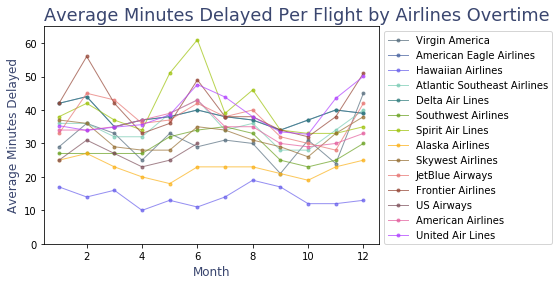

In [46]:
figure, axes = plt.subplots()
axes.plot(VX_wanted['MONTH'], VX_wanted['AVG_MINUTES_DELAYED_PER_FLIGHT'], 
          linestyle='-',linewidth='1',label='Virgin America',
          alpha=0.7,marker='o',markersize='3',color="#566D7E")
axes.plot(MQ_wanted['MONTH'], MQ_wanted['AVG_MINUTES_DELAYED_PER_FLIGHT'], 
          linestyle='-',linewidth='1',label='American Eagle Airlines',
          alpha=0.7,marker='o',markersize='3',color="#4863A0")
axes.plot(HA_wanted['MONTH'], HA_wanted['AVG_MINUTES_DELAYED_PER_FLIGHT'], 
          linestyle='-',linewidth='1',label='Hawaiian Airlines',
          alpha=0.7,marker='o',markersize='3',color="#6960EC")
axes.plot(EV_wanted['MONTH'], EV_wanted['AVG_MINUTES_DELAYED_PER_FLIGHT'], 
          linestyle='-',linewidth='1',label='Atlantic Southeast Airlines',
          alpha=0.7,marker='o',markersize='3',color="#7BCCB5")
axes.plot(DL_wanted['MONTH'], MQ_wanted['AVG_MINUTES_DELAYED_PER_FLIGHT'], 
          linestyle='-',linewidth='1',label='Delta Air Lines',
          alpha=0.7,marker='o',markersize='3',color="#307D7E")
axes.plot(WN_wanted['MONTH'], WN_wanted['AVG_MINUTES_DELAYED_PER_FLIGHT'], 
          linestyle='-',linewidth='1',label='Southwest Airlines',
          alpha=0.7,marker='o',markersize='3',color="#6AA121")
axes.plot(NK_wanted['MONTH'], NK_wanted['AVG_MINUTES_DELAYED_PER_FLIGHT'], 
          linestyle='-',linewidth='1',label='Spirit Air Lines',
          alpha=0.7,marker='o',markersize='3',color="#9DC209")
axes.plot(AS_wanted['MONTH'], AS_wanted['AVG_MINUTES_DELAYED_PER_FLIGHT'], 
          linestyle='-',linewidth='1',label='Alaska Airlines',
          alpha=0.7,marker='o',markersize='3',color="#FBB117")
axes.plot(OO_wanted['MONTH'], OO_wanted['AVG_MINUTES_DELAYED_PER_FLIGHT'], 
          linestyle='-',linewidth='1',label='Skywest Airlines',
          alpha=0.7,marker='o',markersize='3',color="#966F33")
axes.plot(B6_wanted['MONTH'], B6_wanted['AVG_MINUTES_DELAYED_PER_FLIGHT'], 
          linestyle='-',linewidth='1',label='JetBlue Airways',
          alpha=0.7,marker='o',markersize='3',color="#E77471")
axes.plot(F9_wanted['MONTH'], F9_wanted['AVG_MINUTES_DELAYED_PER_FLIGHT'], 
          linestyle='-',linewidth='1',label='Frontier Airlines',
          alpha=0.7,marker='o',markersize='3',color="#954535")
axes.plot(US_wanted['MONTH'], US_wanted['AVG_MINUTES_DELAYED_PER_FLIGHT'], 
          linestyle='-',linewidth='1',label='US Airways',
          alpha=0.7,marker='o',markersize='3',color="#7F525D")
axes.plot(AA_wanted['MONTH'], AA_wanted['AVG_MINUTES_DELAYED_PER_FLIGHT'], 
          linestyle='-',linewidth='1',label='American Airlines',
          alpha=0.7,marker='o',markersize='3',color="#E45E9D")
axes.plot(UA_wanted['MONTH'], UA_wanted['AVG_MINUTES_DELAYED_PER_FLIGHT'], 
          linestyle='-',linewidth='1',label='United Air Lines',
          alpha=0.7,marker='o',markersize='3',color="#B041FF")

axes.legend()
plt.legend(bbox_to_anchor = [1.0, 1.0])

axes.set_title(label='Average Minutes Delayed Per Flight by Airlines Overtime',
               loc='left', size = '17.7', color='#3A466F')

axes.set_ylabel('Average Minutes Delayed', size = '12', color='#3A466F')
axes.set_xlabel('Month', size = '12', color='#3A466F')

axes.set_ylim(0, 65)

#### <font color='#AA5578'> This visualization allows us to analyze what specific airline has the lowest/ highest flight delay rate in a specific month. For example, if we are taking a trip in June, we would definitely want to avoid flying with Spirit Air Lines. If we are taking a trip in February, we would want to avoid flying with Frontier Airlines. Overall, Hawaiian Airlines is the most reliable airlines in terms of how punctual the flights are. 

## <font color='#DD8EAE'>Extra extra Interesting Finding

#### <font color='#AA5578'> I was living in New York City before I came to South Bend for graduate school.I am planning going back to the city for visiting and I would like to figure out which airline I should fly with purely based on its average minutes delayed per flight. Althought I already learned that Hawaiian Airlines is great, but I don't think they have flights from Chicago to NYC, at least not until I take a look into the dataset. I will be evaluating flights that were departured from ORD and arrived at JFK. I am not considering flying to LaGuardia or Neward just because I am too familiar with JFK already :)

In [47]:
from_ord = flights[flights['ORIGIN_AIRPORT']=='ORD']
from_ord_to_jfk = from_ord[from_ord['DESTINATION_AIRPORT']=='JFK']
from_ord_to_jfk_delay = from_ord_to_jfk[from_ord_to_jfk['ARRIVAL_DELAY']>0]
from_ord_to_jfk_delay.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
376,2015,6,13,6,AA,130,N3HAAA,ORD,JFK,1308,...,1707.0,39.0,0,0,NaN,0.0,0.0,39.0,0.0,0.0
4397,2015,9,17,4,AA,130,N3GCAA,ORD,JFK,1231,...,1616.0,16.0,0,0,NaN,0.0,0.0,16.0,0.0,0.0
14763,2015,2,15,7,AA,198,N3CWAA,ORD,JFK,1300,...,1621.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
17853,2015,5,7,4,B6,606,N354JB,ORD,JFK,1545,...,1918.0,13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
19270,2015,9,8,2,B6,606,N645JB,ORD,JFK,1447,...,2254.0,285.0,0,0,NaN,11.0,0.0,0.0,274.0,0.0


In [48]:
total_delays = from_ord_to_jfk_delay.groupby(['AIRLINE'])['FLIGHT_NUMBER'].count().reset_index(name='TOTAL_NUMBER_OF_DELAYS')
total_flights = from_ord_to_jfk.groupby(['AIRLINE'])['FLIGHT_NUMBER'].count().reset_index(name='TOTAL_NUMBER_OF_FLIGHTS')
df = pd.merge(total_delays, total_flights, how='outer')
df

,AIRLINE,TOTAL_NUMBER_OF_DELAYS,TOTAL_NUMBER_OF_FLIGHTS
0,AA,54.0,119
1,B6,81.0,186
2,DL,NaN,2


In [49]:
54/119

0.453781512605042

In [50]:
81/186

0.43548387096774194

#### <font color='#AA5578'> It looks like I do not have much options. Delta had no delays but they only flew twice from ORD to JFK. JetBlue had more flights available and its delay rate was slightly lower than American Airlines. After this quick analysis, I will start looking for flight tickets with JetBlue. 